In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#loaded the given dataset
House_loan = pd.read_csv("Loan_Data.csv")

In [6]:
House_loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
House_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [115]:
#checking for null values
House_loan.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
House_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
Defaulties = (House_loan.TARGET==1).sum()
Payers = (House_loan.TARGET==0).sum()
print((Defaulties/Payers)*100)
#percentage of default to payer of the dataset for the TARGET column

8.781828601345662


<AxesSubplot:ylabel='TARGET'>

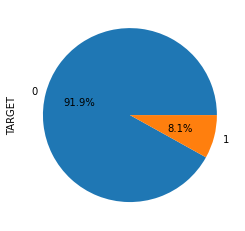

In [117]:
#showing hoe much the data is imbalanced
House_loan.TARGET.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [118]:
#balacing the data
shuffled_data = House_loan.sample(frac=1, random_state=3)
unpaid_home_loan =shuffled_data.loc[shuffled_data['TARGET']==1]
paid_home_loan =shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825, random_state=79)
balanced_home_loan = pd.concat([unpaid_home_loan,paid_home_loan])

<AxesSubplot:ylabel='TARGET'>

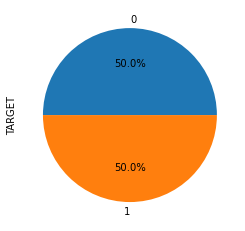

In [120]:
#plotting balanced data and imbalanced data
balanced_home_loan.TARGET.value_counts().plot(kind='pie', autopct= "%1.1f%%")

In [33]:
balanced_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 196131
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [30]:
balanced_home_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
207339,340318,1,Cash loans,F,N,N,0,112500.0,405000.0,21969.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
8756,110186,1,Cash loans,M,Y,N,0,135000.0,544491.0,17563.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
230344,366811,1,Cash loans,F,N,Y,0,112500.0,225000.0,17905.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
178329,306645,1,Cash loans,M,Y,Y,0,157500.0,595273.5,29083.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
55586,164407,1,Cash loans,M,N,N,0,157500.0,521451.0,35406.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
balanced_home_loan.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
279124,423360,1,Cash loans,M,Y,N,1,157500.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
216116,350411,1,Cash loans,M,Y,N,0,112500.0,225000.0,25447.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0
133687,255050,1,Cash loans,M,Y,N,1,337500.0,704844.0,26977.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
4159,104863,1,Cash loans,M,Y,N,0,265500.0,521280.0,28408.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
208602,341779,1,Cash loans,F,Y,Y,1,247500.0,544491.0,17694.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295932,442859,0,Cash loans,M,Y,N,1,243000.0,373311.0,16573.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
150803,274805,0,Cash loans,M,Y,Y,0,157500.0,738108.0,53842.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
136647,258490,0,Revolving loans,F,Y,Y,0,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
147620,271165,0,Cash loans,F,Y,N,1,131400.0,1015519.5,27922.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0


In [35]:
balanced_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 196131
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [36]:
balanced_home_loan.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7507
AMT_REQ_CREDIT_BUREAU_WEEK    7507
AMT_REQ_CREDIT_BUREAU_MON     7507
AMT_REQ_CREDIT_BUREAU_QRT     7507
AMT_REQ_CREDIT_BUREAU_YEAR    7507
Length: 122, dtype: int64

# IDENTIFYING THE IMPORTANT COLUMNS 

<AxesSubplot:ylabel='TARGET'>

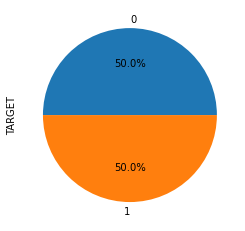

In [39]:
balanced_home_loan.TARGET.value_counts().plot(kind="pie", autopct="%1.1f%%")

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

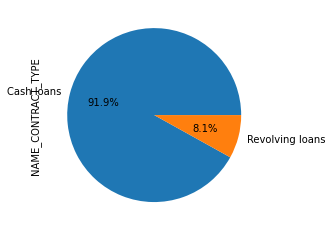

In [40]:
balanced_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind="pie", autopct="%1.1f%%")

<AxesSubplot:ylabel='CODE_GENDER'>

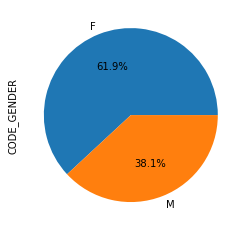

In [41]:
balanced_home_loan.CODE_GENDER.value_counts().plot(kind="pie", autopct="%1.1f%%")

<AxesSubplot:ylabel='FLAG_OWN_CAR'>

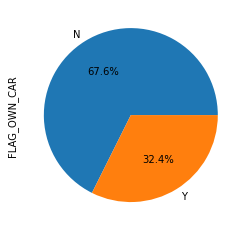

In [42]:
balanced_home_loan.FLAG_OWN_CAR.value_counts().plot(kind= "pie",autopct="%1.1f%%")

<AxesSubplot:ylabel='CNT_CHILDREN'>

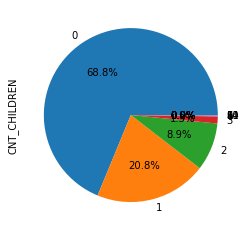

In [43]:
balanced_home_loan.CNT_CHILDREN.value_counts().plot(kind="pie", autopct="%1.1f%%")

In [121]:
#as number of children is increasing lone defaulters are increasing
print((balanced_home_loan[balanced_home_loan["CNT_CHILDREN"]>1]["TARGET"].value_counts())/len(balanced_home_loan[balanced_home_loan["CNT_CHILDREN"] > 1])*100)
print((balanced_home_loan[balanced_home_loan["CNT_CHILDREN"]>2]["TARGET"].value_counts())/len(balanced_home_loan[balanced_home_loan["CNT_CHILDREN"] > 2])*100)
print((balanced_home_loan[balanced_home_loan["CNT_CHILDREN"]>5]["TARGET"].value_counts())/len(balanced_home_loan[balanced_home_loan["CNT_CHILDREN"] > 5])*100)

1    53.258774
0    46.741226
Name: TARGET, dtype: float64
1    55.569948
0    44.430052
Name: TARGET, dtype: float64
1    75.0
0    25.0
Name: TARGET, dtype: float64


In [122]:
#people with own cars are slighlty more likely to repay back the loan 
balanced_home_loan[balanced_home_loan["FLAG_OWN_CAR"]=="N"]["TARGET"].value_counts()/len(balanced_home_loan[balanced_home_loan["FLAG_OWN_CAR"]== "N"])*100

1    51.371475
0    48.628525
Name: TARGET, dtype: float64

In [57]:
balanced_home_loan[balanced_home_loan["FLAG_OWN_CAR"]=="Y"]["TARGET"].value_counts()/len(balanced_home_loan[balanced_home_loan["FLAG_OWN_CAR"]== "Y"])*100

0    52.865053
1    47.134947
Name: TARGET, dtype: float64

In [59]:
balanced_home_loan[balanced_home_loan["CODE_GENDER"]=="M"]["TARGET"].value_counts()/len(balanced_home_loan[balanced_home_loan["CODE_GENDER"]== "M"])*100

1    56.333933
0    43.666067
Name: TARGET, dtype: float64

In [60]:
balanced_home_loan[balanced_home_loan["CODE_GENDER"]=="F"]["TARGET"].value_counts()/len(balanced_home_loan[balanced_home_loan["CODE_GENDER"]== "F"])*100
#male are more defaulty than female

0    53.89771
1    46.10229
Name: TARGET, dtype: float64

In [61]:
balanced_home_loan[balanced_home_loan["NAME_CONTRACT_TYPE"]=="Cash loans"]["TARGET"].value_counts()/len(balanced_home_loan[balanced_home_loan["NAME_CONTRACT_TYPE"]== "Cash loans"])*100

1    50.874157
0    49.125843
Name: TARGET, dtype: float64

In [123]:
balanced_home_loan[balanced_home_loan["NAME_CONTRACT_TYPE"]=="Revolving loans"]["TARGET"].value_counts()/len(balanced_home_loan[balanced_home_loan["NAME_CONTRACT_TYPE"]== "Revolving loans"])*100
#more defaulty have cash loans

0    59.96006
1    40.03994
Name: TARGET, dtype: float64

ENCODING THE COLUMNS

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
ordec = OrdinalEncoder()

In [67]:
balanced_home_loan["NAME_CONTRACT_TYPE_ENCODED"] = ordec.fit_transform(balanced_home_loan[["NAME_CONTRACT_TYPE"]])
print(balanced_home_loan[["NAME_CONTRACT_TYPE","NAME_CONTRACT_TYPE_ENCODED"]].head())
print(balanced_home_loan["NAME_CONTRACT_TYPE_ENCODED"].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_ENCODED
207339         Cash loans                         0.0
8756           Cash loans                         0.0
230344         Cash loans                         0.0
178329         Cash loans                         0.0
55586          Cash loans                         0.0
0.0    45644
1.0     4006
Name: NAME_CONTRACT_TYPE_ENCODED, dtype: int64


In [68]:
balanced_home_loan["CODE_GENDER_ENCODED"] = ordec.fit_transform(balanced_home_loan[["CODE_GENDER"]])
print(balanced_home_loan[["CODE_GENDER","CODE_GENDER_ENCODED"]].head())
print(balanced_home_loan["CODE_GENDER_ENCODED"].value_counts())

       CODE_GENDER  CODE_GENDER_ENCODED
207339           F                  0.0
8756             M                  1.0
230344           F                  0.0
178329           M                  1.0
55586            M                  1.0
0.0    30736
1.0    18914
Name: CODE_GENDER_ENCODED, dtype: int64


In [69]:
balanced_home_loan["FLAG_OWN_CAR_ENCODED"] = ordec.fit_transform(balanced_home_loan[["FLAG_OWN_CAR"]])
print(balanced_home_loan[["FLAG_OWN_CAR","FLAG_OWN_CAR_ENCODED"]].head())
print(balanced_home_loan["FLAG_OWN_CAR_ENCODED"].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_ENCODED
207339            N                   0.0
8756              Y                   1.0
230344            N                   0.0
178329            Y                   1.0
55586             N                   0.0
0.0    33577
1.0    16073
Name: FLAG_OWN_CAR_ENCODED, dtype: int64


In [70]:
balanced_home_loan["CNT_CHILDREN_ENCODED"] = ordec.fit_transform(balanced_home_loan[["CNT_CHILDREN"]])
print(balanced_home_loan[["CNT_CHILDREN","CNT_CHILDREN_ENCODED"]].head())
print(balanced_home_loan["CNT_CHILDREN_ENCODED"].value_counts())

        CNT_CHILDREN  CNT_CHILDREN_ENCODED
207339             0                   0.0
8756               0                   0.0
230344             0                   0.0
178329             0                   0.0
55586              0                   0.0
0.0     34141
1.0     10323
2.0      4414
3.0       650
4.0        95
5.0        15
6.0         7
7.0         2
8.0         1
9.0         1
10.0        1
Name: CNT_CHILDREN_ENCODED, dtype: int64


In [71]:
balanced_home_loan["TARGET"].value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [78]:
balanced_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_ENCODED','CNT_CHILDREN_ENCODED','FLAG_OWN_CAR_ENCODED','CODE_GENDER_ENCODED']

TRAIN AND TEST SPLIT

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x= balanced_home_loan[balanced_home_loan_features]

In [81]:
y = balanced_home_loan.TARGET

In [90]:
from sklearn.datasets import make_blobs

In [91]:
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

In [92]:
X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)

In [93]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 2) (16385, 2) (33265,) (16385,)


In [94]:
import matplotlib as plt

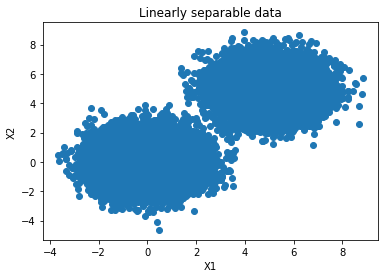

In [95]:
plt.pyplot.scatter(X_train[:,0], X_train[:,1])
plt.pyplot.title('Linearly separable data')
plt.pyplot.xlabel('X1')
plt.pyplot.ylabel('X2')
plt.pyplot.show()

MODEL BUILDING

In [101]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score

In [99]:
clus = svm.SVC(kernel="linear")
clus = clus.fit(X_train,y_train)

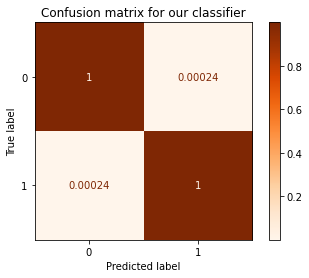

In [108]:
predictions = clus.predict(X_test)

matrix = plot_confusion_matrix(clus, X_test, y_test,cmap=plt.cm.Oranges,normalize= 'true')
plt.pyplot.title('Confusion matrix for our classifier')
plt.pyplot.show(matrix)
plt.pyplot.show()

In [102]:
precision_score(y_test, predictions)

0.9997566613943302

In [103]:
recall_score(y_test, predictions)

0.9997566613943302

In [104]:
f1_score(y_test,predictions,average=None)

array([0.99975508, 0.99975666])

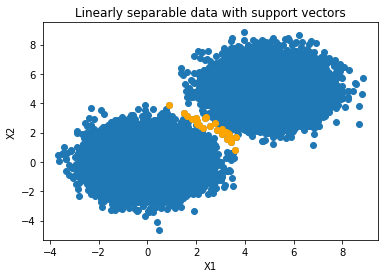

In [109]:
support_vectors = clus.support_vectors_

# Visualize support vectors
plt.pyplot.scatter(X_train[:,0], X_train[:,1])
plt.pyplot.scatter(support_vectors[:,0], support_vectors[:,1], color='orange')
plt.pyplot.title('Linearly separable data with support vectors')
plt.pyplot.xlabel('X1')
plt.pyplot.ylabel('X2')
plt.pyplot.show()

In [110]:
from mlxtend.plotting import plot_decision_regions

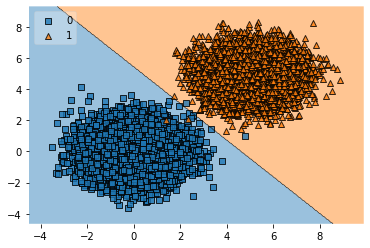

In [114]:
plot_decision_regions(X_test, y_test, clf=clus, legend=2)
plt.pyplot.show()